
<div style="text-align:center;border-radius:20px;background-color:#0d99db;border: 0.2rem solid black;margin:1%;font-weight : bold;">
    <h1 style="margin:30px;font-size:3rem">Descente de gradient</h1> </div>
<p style="text-align:center">Par LANNUZEL Dylan & HAYEK Sofiene</p>

Dans le cadre de la **SAE202 : Exploration algorithmique d'un problème**, Il nous a été demandé de réaliser un projet mathématiques et informatique. <br>
Nous avons choisi de réaliser le projet: *Optimisation: Descente de gradient*


Voici la description qui a été donnée : 

- **Niveau de difficulté** : ☆☆

- **Description** : L'algorithme du gradient est une méthode permettant de déterminer l'extrema (local)
d'une fonction sur un intervalle donnée.

- **Annimation** : Les différentes étapes de l'algorithme sur trois fonctions différentes.

En effet, l'un des objectifs du projet était, entre autres, de réaliser au moins une animation représentant notre algorithme.
Nous avons travaillé environ 7 h sur ce projet et avons réparti le travail comme suit :
- Sofiene : recherche des fonctions et rédaction de ce rapport
- Dylan : modélisation informatique et mathématique des fonctions et réalisation des animations


<div style="background-color:#81d6fe; border : 3px solid black; border-radius : 19px;margin : 0% 10% ; padding : 1%;text-align : center;font-size : 2em;">
    Bibliothèques
</div>

In [5]:
#Fonction aléatoire
from random import *
from math import *
import numpy as np

#Fonction de graphique et d'animation
from matplotlib.pyplot import *
from matplotlib import animation
from IPython.display import HTML
from IPython.display import Markdown as md

<div style="background-color:#81d6fe; border : 3px solid black; border-radius : 19px;margin : 0% 10% ; padding : 1%;text-align : center;font-size : 1.8em;">
    Algorithme
</div>

- Choisir une fonction et un intervalle
- Choisir un point initiale sur la courbe
- Calculer la pente au niveau de notre point
- Faire 'glisser' notre point pour esperer converge en un point et trouver un minimum local
- Réitérer l'algorithme si le minimum trouvé n'est pas le minimum global de la fonction sur l'intervalle souhaité

#### Nous allons donc avec 3 fonctions différentes utliser la méthode de descente de gradient pour trouver le minimum sur un interval que l'on aura choisi au préalable.

<div style="background-color:#81d6fe; border : 3px solid black; border-radius : 19px;margin : 0% 10% ; padding : 1%;text-align : center;font-size : 1.8em;">
    $f(x)= 2x^{2} \cos(x) -5x$
</div>

On défini la fonction choisie dans une fonction python.

In [6]:
def f(x):
    return 2*x*x*cos(x)-5*x

On trace la répresentation graphique de $f(x)$ sur l'intervalle $\left[-10;10\right]$


In [7]:
imin=-10
imax=10

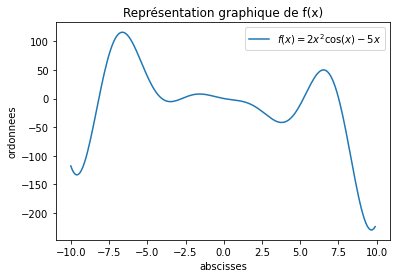

In [8]:
x = np.arange(imin, imax, 0.1)
y = np.array([f(i) for i in x])

xlabel("abscisses")
ylabel("ordonnees")

title("Représentation graphique de f(x)")
plot(x, y, label='$f(x)= 2x^{2} \cos(x) -5x$')
legend()
show()

**1ère Etape**: On commence par choisir un point au hasard sur la courbe

In [9]:
x0=-6
image = f(x0)
print("l'image de", x0, "par la fonction f est", image)

l'image de -6 par la fonction f est 99.13226063882635


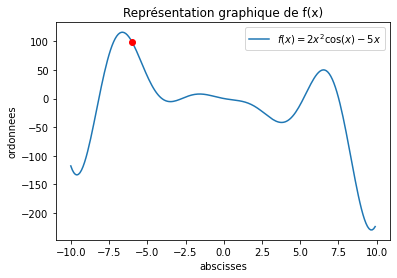

In [10]:
x = np.arange(imin, imax, 0.1)
y = np.array([f(i) for i in x])

xlabel("abscisses")
ylabel("ordonnees")

title("Représentation graphique de f(x)")
plot(x, y, label='$f(x)= 2x^{2} \cos(x) -5x$')
plot(x0, image, marker="o", color="red")
legend()
show()

On distingue donc notre premier point sur la courbe, l'enjeu va etre alors de faire descendre ce point comme une bille pour arriver dans le creux, en effet la descente de gradient ne permet pas de trouver à coup sur le minimum global de la fonction sur un intervalle. Il faudra donc par la suite refaire l'algorithme avec une valeur initiale différente, ce principe est appelé en machine learning 'epoch'. 

**2ème Etape**: On calcule la valeur de la pente soit soit la dérivée de la fonction au niveau de notre point.

En effet grace à cette valeur on pourra faire 'glisser' notre point et en plus cela est utile car au niveau du minimum notre pente est très proche de 0.

In [11]:
# On a donc cette fonction en python qui calcule la dérivée et donc la pente en un point nommé x
def df(x):
    return 4*x*cos(x)-2*x*x*sin(x)-5

pente=df(x0)
print(pente)

-48.162002749931446


Avec notre point initial égal à -6 on remarque que en ce point la pente est négative et donc descend vers la droite et a une valeur à environ -48.

Il faut donc maintenant faire 'glisser' ce point et donc avancer vers la droite. Mais de combien faut-il avancer ? <br>
C'est une question qui correspond à trouver un $\alpha$ indéquat. Ce pas est aussi appelé en machine learning le 'taux d'apprentissage'. Plus notre $\alpha$ est grand moins il faudra d'itération. En effet, puisqu'il va plus loin à chaque itération, mais si on initialise cette ce $\alpha$ avec une très grande bah naturellement il va aller trop loin et échapper à un minimum et donc passer à coté de notre Objectif ! 

On avance donc dans la direction opposée à la pente avec la formule suivante: $x_{-1}-\alpha * f'(x_{-1})$ <br> 
On va donc commencer avec une petite valeur, avec $\alpha$ = 0.01 pour correctement trouveer le minimum.

In [12]:
alpha = 0.01

Cette fonction correspond au critère d'arret permettant de juger de la convergence (compare la différence entre la valeur courante et la précédente) et donc de pouvoir suivant la descente et le contexte mathématique de pouvoir retourner un résultat de manière efficiente et adaptative.

In [13]:
def isConvergent(fx1, fx2, epsilon):
    return abs(fx1-fx2)<=epsilon

On a donc cette fonction qui calcule donc notre minimum local

In [14]:
def gradient(x1):
    i = 0
    while not isConvergent(x1, x1-alpha*df(x1), 0.0001): # Si on estime que cela converge on s'arrete
        i+=1
        x1 = x1-alpha*df(x1)
    return (x1,i) # Retour du minimum et du nombre d'itérations correspondant
r = gradient(x0)[0]
print(gradient(x0)[1], "itérations")

25 itérations


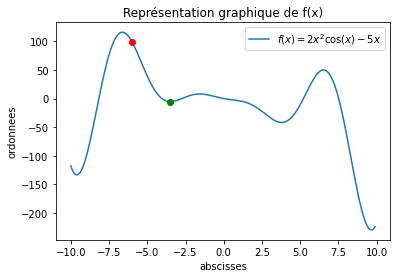

In [15]:
x = np.arange(imin, imax, 0.1)
y = np.array([f(i) for i in x])

xlabel("abscisses")
ylabel("ordonnees")

title("Représentation graphique de f(x)")
plot(x, y, label='$f(x)= 2x^{2} \cos(x) -5x$')
plot(x0, image, marker="o", color="red")
plot(r, f(r), marker="o", color="green")
legend()
show()

On remarque donc en affichant le point trouvé à l'aide de notre algorithme sur la courbe, qu'il s'est bien placé dans un creux et est donc bien un minimum local. Cependant d'après la représentation graphique de notre fonction $f(x)$ sur l'intervalle $\left[-10;10\right]$ qu'il y a bien un autre minimum local qui lui correspond au minimum global avec un $x$ environ égal à 9.5 de la fonction sur notre intervalle.

Pour ce faire on va reitérer l'algorithme avec un $x0$ différent, récupérer les valeurs et garder la plus petite.

Cette fonction élaborée par nos soins permet de trouver les x0 différents où l'on va tester l'algorithme de descente de gradient suivant l'intervalle de la fonction $f(x)$

In [16]:
def findX0s(imin, imax):
    i=imin
    ecart=sqrt(abs(imin)+abs(imax))
    values=[imin]
    while i+ecart < imax:
        i+=ecart
        values.append(i)    
    return values 

On peut voir ici la découpe de la fonction suivant la position des x0 à tester et donc la pertinence de cette étape de multiple exécutions


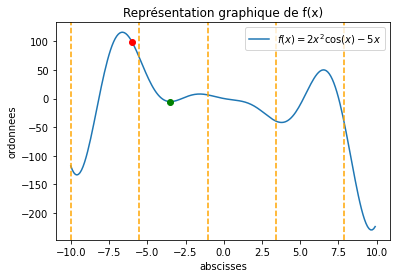

In [17]:
x = np.arange(imin, imax, 0.1)
y = np.array([f(i) for i in x])

xlabel("abscisses")
ylabel("ordonnees")

title("Représentation graphique de f(x)")
plot(x, y, label='$f(x)= 2x^{2} \cos(x) -5x$')
plot(x0, image, marker="o", color="red")
plot(r, f(r), marker="o", color="green")
for d in findX0s(imin, imax):
    axvline(x=d, color='orange', linestyle='--')
legend()

print("On peut voir ici la découpe de la fonction suivant la position des x0 à tester et donc la pertinence de cette étape de multiple exécutions")

show()

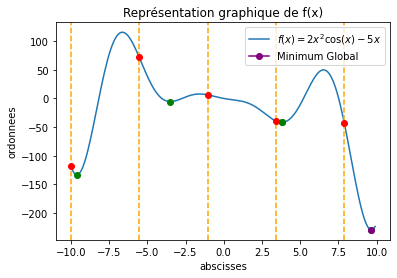

In [18]:
minimums={}
x = np.arange(imin, imax, 0.1)
y = np.array([f(i) for i in x])

xlabel("abscisses")
ylabel("ordonnees")

title("Représentation graphique de f(x)")
plot(x, y, label='$f(x)= 2x^{2} \cos(x) -5x$')
for x0 in findX0s(imin, imax):
    r = gradient(x0)[0]
    minimums[r] = f(r)
    axvline(x=x0, color='orange', linestyle='--')
    plot(x0, f(x0), marker="o", color="red")
    plot(r, f(r), marker="o", color="green")
    
def getXFromY(dico, y):
    for key, value in dico.items():
         if y == value:
             return key
 
    return None
    
global_min_y = min(list(minimums.values()))
global_min_x = getXFromY(minimums, global_min_y)

plot(global_min_x, global_min_y, marker="o", markersize=6, color="purple", label="Minimum Global")

legend()
show()

In [19]:
print("Minimum sur:", "x=", global_min_x, "y=", global_min_y)

Minimum sur: x= 9.65534269033191 y= -229.79403016032222


On peut donc conclure que le minimum global de la fonction $f(x)$ sur $\left[-10;10\right]$ est de -229.79403016032222 atteint en un $x$ égal à 9.65534269033191

In [ ]:
fig = figure(figsize=(6,6))

xlim(imin, imax)
xlabel("abscisses")
ylabel("ordonnees")

grid(True)

title("Représentation graphique de $f(x)$")

plot(x, y, label='$f(x)= 2x^{2} \cos(x) -5x$')

datas = []
i = 0
for x0 in findX0s(imin, imax):
    data = []
    x1 = x0
    plot(x0, f(x0), marker="o", color="red")
    axvline(x=x0, color='orange', linestyle='--')

    while not isConvergent(x1, x1-alpha*df(x1), 0.0001): # Si on estime que cela converge on s'arrete
        i+=1
        x1 = x1-alpha*df(x1)
        data.append(x1)

    datas.append(data)

x = np.arange(imin, imax, 0.1)
y = np.array([f(i) for i in x])

#Nombre de frame
nb_frames=i

#L'animation
def Mon_Animation(num_frame):
    print("\rCalculs en cours : "+str(round(num_frame/nb_frames*100, 2))+"%", "          ", end='')
    if num_frame == 0 or num_frame==nb_frames:
        return ()
    for d in datas:
        i=0
        while i < len(d):
            v = d[i]
            i+=1
            plot(v, f(v), marker="o", markersize=6, color="green")
            ite.set_text(str(i)+" itérations")
    return ()

#Initialisation
ite=text(1.2, 0.8, "", fontsize=13, color="red")

#Affichage des label
legend()

ani =animation.FuncAnimation(fig, Mon_Animation, frames=nb_frames, interval=100, blit=True)
HTML(ani.to_jshtml())

Calculs en cours : 1.79%           

C:\Users\lannu\AppData\Local\Temp\ipykernel_11836\1113981140.py:55: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  HTML(ani.to_jshtml())


Calculs en cours : 10.26%           

<div style="background-color:#81d6fe; border : 3px solid black; border-radius : 19px;margin : 0% 10% ; padding : 1%;text-align : center;font-size : 1.8em;">
    $g(x)= -sin(x)+2cos(x)x+2sin(x)$
</div>

On défini la fonction choisie dans une fonction python.

In [20]:
def g(x):
    return -sin(x)+2*cos(x)*x+2*sin(x)

On trace la répresentation graphique de $g(x)$ sur l'intervalle $\left[-12;8\right]$

In [21]:
imin = -12
imax = 8

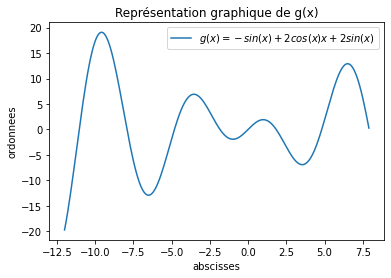

In [22]:
x = np.arange(imin, imax, 0.1)
y = np.array([g(i) for i in x])

xlabel("abscisses")
ylabel("ordonnees")

title("Représentation graphique de g(x)")
plot(x, y, label='$g(x)= -sin(x)+2cos(x)x+2sin(x)$')
legend()
show()

**1ère Etape**: On commence par choisir un point au hasard sur la courbe

In [23]:
x0=-8.5
image = g(x0)
print("l'image de", x0, "par la fonction g est", image)

l'image de -8.5 par la fonction g est 9.435715233018513


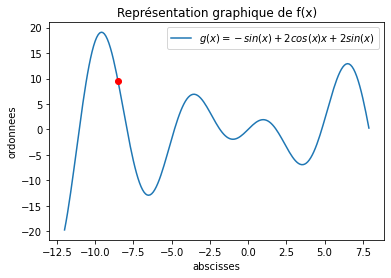

In [24]:
x = np.arange(imin, imax, 0.1)
y = np.array([g(i) for i in x])

xlabel("abscisses")
ylabel("ordonnees")

title("Représentation graphique de f(x)")
plot(x, y, label='$g(x)= -sin(x)+2cos(x)x+2sin(x)$')
plot(x0, image, marker="o", color="red")
legend()
show()

**2ème Etape**: On calcule la valeur de la pente soit soit la dérivée de la fonction au niveau de notre point.

In [25]:
# On a donc cette fonction en python qui calcule la dérivée et donc la pente en un point nommé x
def dg(x):
    return -cos(x)+2*(-sin(x))*x+2*cos(x)+2*cos(x)

pente=dg(x0)
print(pente)

-15.380316622653806


In [26]:
def gradient(x1):
    i = 0
    while not isConvergent(x1, x1-alpha*dg(x1), 0.0001): # Si on estime que cela converge on s'arrete
        i+=1
        x1 = x1-alpha*dg(x1)
    return (x1,i) # Retour du minimum et du nombre d'itérations correspondant
r = gradient(x0)[0]
print(gradient(x0)[1], "itérations")

55 itérations


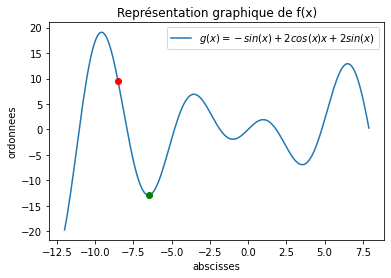

In [27]:
x = np.arange(imin, imax, 0.1)
y = np.array([g(i) for i in x])

xlabel("abscisses")
ylabel("ordonnees")

title("Représentation graphique de f(x)")
plot(x, y, label='$g(x)= -sin(x)+2cos(x)x+2sin(x)$')
plot(x0, image, marker="o", color="red")
plot(r, g(r), marker="o", color="green")
legend()
show()

In [28]:
print(r, g(r))

-6.510347206427906 -12.911399456309445


On trouve donc le minimum en x=-6.51 et y=-12.91 sur l'intervalle $\left[-12;8\right]$

Calculs en cours : 98.18%           

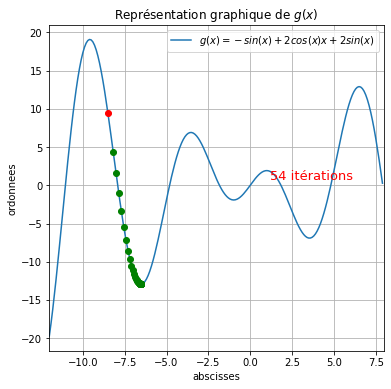

In [29]:
fig = figure(figsize=(6,6))

xlim(imin, imax)
xlabel("abscisses")
ylabel("ordonnees")

grid(True)

title("Représentation graphique de $g(x)$")

plot(x, y, label='$g(x)= -sin(x)+2cos(x)x+2sin(x)$')

i = 0
x1 = x0
plot(x0, image, marker="o", color="red")

datas = []

while not isConvergent(x1, x1-alpha*dg(x1), 0.0001): # Si on estime que cela converge on s'arrete
    i+=1
    x1 = x1-alpha*dg(x1)
    datas.append(x1)

r = gradient(x0)[0]
iterations = gradient(x0)[1]

x = np.arange(imin, imax, 0.1)
y = np.array([g(i) for i in x])

#Nombre de frame
nb_frames=iterations

#L'animation
def Mon_Animation(num_frame):
    print("\rCalculs en cours : "+str(round(num_frame/nb_frames*100, 2))+"%", "          ", end='')
    if num_frame == 0 or num_frame==nb_frames:
        return ()
    v = datas[num_frame]
    plot(v, g(v), marker="o", markersize=6, color="green")
    ite.set_text(str(num_frame)+" itérations")
    return ()

#Initialisation
ite=text(1.2, 0.8, "", fontsize=13, color="red")

#Affichage des label
legend()

ani =animation.FuncAnimation(fig, Mon_Animation, frames=nb_frames, interval=100, blit=True)
HTML(ani.to_jshtml())

<div style="background-color:#81d6fe; border : 3px solid black; border-radius : 19px;margin : 0% 10% ; padding : 1%;text-align : center;font-size : 1.8em;">
    $j(x)= 7x^2-2cos(x)+3x$
</div>

In [30]:
def j(x):
    return 7*x**2+2*cos(x)+3*x

In [31]:
imin = -17
imax = 15

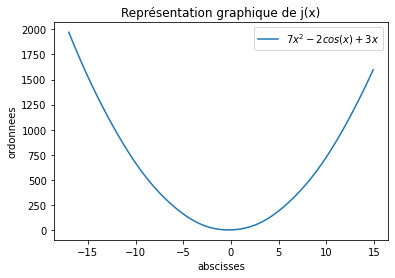

In [32]:
x = np.arange(imin, imax, 0.1)
y = np.array([j(i) for i in x])

xlabel("abscisses")
ylabel("ordonnees")

title("Représentation graphique de j(x)")
plot(x, y, label='$7x^2-2cos(x)+3x$')
legend()
show()

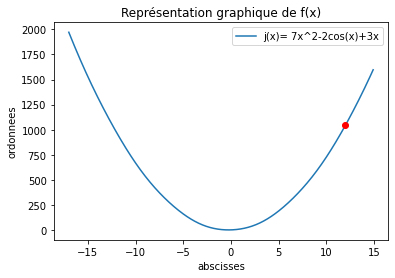

In [33]:
x0=randint(-17,15)
image = j(x0)
x = np.arange(imin, imax, 0.1)
y = np.array([j(i) for i in x])
xlabel("abscisses")
ylabel("ordonnees")
title("Représentation graphique de f(x)")
plot(x, y, label='j(x)= 7x^2-2cos(x)+3x')
plot(x0, image, marker="o", color="red")
legend()
show() 

In [34]:
md("L'image de {} par la fonction $g(x)=7x^2-2cos(x)+3x$ est de ".format(x0) + "{}".format(image))

L'image de 12 par la fonction $g(x)=7x^2-2cos(x)+3x$ est de 1045.687707917465

In [35]:
def dj(x):
    return 14*x+2*sin(x)+3

In [36]:
pente=dj(x0)
print("La pente est égale à", pente, "au point x0=", x0)

La pente est égale à 169.92685416399914 au point x0= 12


In [37]:
def gradient(x1):
    i = 0
    while not isConvergent(x1, x1-alpha*dj(x1), 0.0001): # Si on estime que cela converge on s'arrete
        i+=1
        x1 = x1-alpha*dj(x1)
    return (x1,i) # Retour du minimum et du nombre d'itérations correspondant
r = gradient(x0)[0]
print(gradient(x0)[1], "itérations")

59 itérations


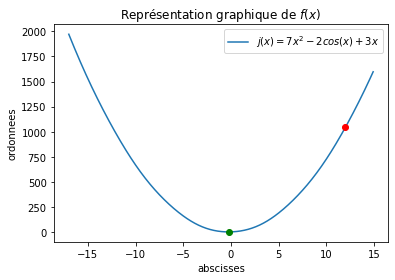

In [38]:
x = np.arange(imin, imax, 0.1)
y = np.array([j(i) for i in x])

title("Représentation graphique de $f(x)$")
xlabel("abscisses")
ylabel("ordonnees")
plot(x, y, label='$j(x)= 7x^2-2cos(x)+3x$')
plot(x0, image, marker="o", color="red")
plot(r, j(r), marker="o", color="green")
legend()
show()

In [39]:
md("On trouve donc le minimum global de la fonction $j(x)= 7x^2-2cos(x)+3x$ avec $x$ = {} et ".format(r) + "$y$ = {}".format(j(r)))

On trouve donc le minimum global de la fonction $j(x)= 7x^2-2cos(x)+3x$ avec $x$ = -0.18707109403168481 et $y$ = 1.648862221894912

Calculs en cours : 100.0%           

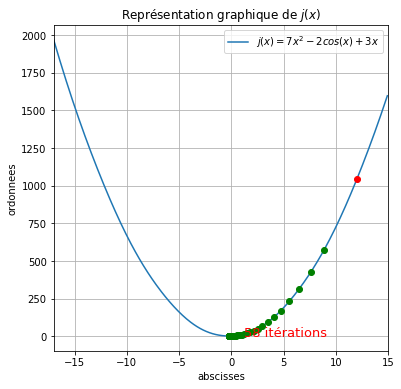

In [40]:
fig = figure(figsize=(6,6))

xlim(imin, imax)
xlabel("abscisses")
ylabel("ordonnees")

grid(True)

title("Représentation graphique de $j(x)$")

plot(x, y, label='$j(x)= 7x^2-2cos(x)+3x$')

i = 0
x1 = x0
plot(x0, image, marker="o", color="red")

datas = []

while not isConvergent(x1, x1-alpha*dj(x1), 0.0001): # Si on estime que cela converge on s'arrete
    i+=1
    x1 = x1-alpha*dj(x1)
    datas.append(x1)

r = gradient(x0)[0]
iterations = gradient(x0)[1]

x = np.arange(imin, imax, 0.1)
y = np.array([j(i) for i in x])

#Nombre de frame
nb_frames=iterations

#L'animation
def Mon_Animation(num_frame):
    print("\rCalculs en cours : "+str(round(num_frame/nb_frames*100, 2))+"%", "          ", end='')
    if num_frame == 0 or num_frame==nb_frames:
        return ()
    v = datas[num_frame]
    plot(v, j(v), marker="o", markersize=6, color="green")
    ite.set_text(str(num_frame)+" itérations")
    return ()

#Initialisation
ite=text(1.2, 0.8, "", fontsize=13, color="red")

#Affichage des label
legend()

ani =animation.FuncAnimation(fig, Mon_Animation, frames=nb_frames+1, interval=100, blit=True)
HTML(ani.to_jshtml())